# WhatsApp Chat Analysis

In [1]:
# Import Libraries
import re
import pandas as pd
import emoji
import matplotlib.pyplot as mp

## Detecting {Date} and {Time} tokens

In [2]:
def date(l):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, l)
    if result:
        return True
    return False

## Detecting the {Author} tokens

In [3]:
def isauthor(l):
    pattern = [
        '([\w]+):',
        '([\w]+[\s]+[\w]+):',
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',
        '([+]\d{2} \d{5} \d{5}):'
    ]
    patterns = '^' + '|'.join(pattern)
    result = re.match(patterns, l)
    if result:
        return True
    return False

## Extracting Each Token From the Line and Coverting it as a Data Point

In [4]:
def DataPoint(line):
    SplitLine = line.split(' - ')
    DT = SplitLine[0]
    DateTime = DT.split(', ')
    Date = DateTime[0]
    Time = DateTime[1]
    Message = ' '.join(SplitLine[1:])
    
    if isauthor(Message):
        authormes = Message.split(': ')
        Author = authormes[0]
        Message = ' '.join(authormes[1:])
    else:
        Author = None
    return Date, Time, Author, Message

## Parsing the Entire File Line by line and also Handling the Multiline Texts.

In [5]:
parsedData = []
FilePath = 'WhatsApp Chat.txt'
with open(FilePath, encoding="utf-8") as fp:
        
    messageBuffer = []
    Date, Time, Author = None, None, None
    
    while True:
        line = fp.readline() 
        if not line:
            break
        line = line.strip() 
        if date(line): 
            if len(messageBuffer) > 0:
                parsedData.append([Date, Time, Author, ' '.join(messageBuffer)])
            messageBuffer.clear() 
            Date, Time, Author, Message = DataPoint(line)
            messageBuffer.append(Message)
        else:
            messageBuffer.append(line)

## Created a DataFrame

In [6]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df

,Date,Time,Author,Message
0,01/02/2019,06:01,None,Siddharth Crescent's security code changed. Ta...
1,01/02/2019,09:53,Adithya,Alika mam
2,01/02/2019,09:53,Adithya,Know
3,01/02/2019,09:53,Emma Watson,Akila
4,01/02/2019,09:53,Emma Watson,da
...,...,...,...,...
51013,24/07/2020,23:24,Emma Watson,<Media omitted>
51014,24/07/2020,23:36,Samuel,<Media omitted>
51015,24/07/2020,23:36,Cibhi Baskar,<Media omitted>
51016,24/07/2020,23:38,Samuel,<Media omitted>


## Renaming the Group Members with their Actual Names

In [7]:
df['Author'].unique()

array([None, 'Adithya', 'Emma Watson', 'Bala', 'Hariharan',
       'Siddharth Crescent', 'Cibhi Baskar', 'Raees', 'Ashwin',
       'Abu Talha', 'Ashik', '+91 90034 84807', 'Irshad',
       'Shivamani Crescent', 'Samuel', 'Malav Crescent',
       '+91 73735 81989', 'Jaya Surya Crescent'], dtype=object)

In [8]:
df['Author'] = df['Author'].replace('Siddharth Crescent','Siddharth')
df['Author'] = df['Author'].replace('Shivamani Crescent','Shivamani')
df['Author'] = df['Author'].replace('Malav Crescent','Malav')
df['Author'] = df['Author'].replace('+91 73735 81989','Jayasurya')
df['Author'] = df['Author'].replace('+91 90034 84807','Samuel')
df['Author'] = df['Author'].replace('Jaya Surya Crescent','Jayasurya')

## Dropping Messages with No Authors

In [9]:
NoneValues = df[df['Author'].isnull()]
NoneValues

,Date,Time,Author,Message
0,01/02/2019,06:01,None,Siddharth Crescent's security code changed. Ta...
104,03/02/2019,08:34,None,Hariharan's security code changed. Tap for mor...
105,03/02/2019,09:17,None,Hariharan's security code changed. Tap for mor...
106,03/02/2019,12:28,None,Hariharan's security code changed. Tap for mor...
109,03/02/2019,21:09,None,Hariharan's security code changed. Tap for mor...
...,...,...,...,...
37433,27/06/2020,09:31,None,Emma Watson's security code changed. Tap for m...
39230,06/07/2020,05:10,None,Emma Watson's security code changed. Tap for m...
43833,16/07/2020,21:31,None,Irshad's security code changed. Tap for more i...
43834,16/07/2020,21:36,None,Irshad's security code changed. Tap for more i...


In [10]:
df = df.drop(NoneValues.index)
df

,Date,Time,Author,Message
1,01/02/2019,09:53,Adithya,Alika mam
2,01/02/2019,09:53,Adithya,Know
3,01/02/2019,09:53,Emma Watson,Akila
4,01/02/2019,09:53,Emma Watson,da
5,01/02/2019,10:11,Adithya,Mamae
...,...,...,...,...
51013,24/07/2020,23:24,Emma Watson,<Media omitted>
51014,24/07/2020,23:36,Samuel,<Media omitted>
51015,24/07/2020,23:36,Cibhi Baskar,<Media omitted>
51016,24/07/2020,23:38,Samuel,<Media omitted>


## Top 10 Frequently used Emojis by the Group Members

In [11]:
emojis=[]
for i in df['Message']:
    my_str = str(i)
    for j in my_str:
        if j in emoji.UNICODE_EMOJI:
            emojis.append(j)

In [12]:
emo = pd.Series(emojis)
TopEmoji = emo.value_counts().head(5)
TopEmoji

😂    4273
🙂    1360
🤣     702
🔥     663
😍     454
dtype: int64

## Analysing the Number of Media Messages Sent by the Group Members

In [13]:
MediaValues = df[df['Message'] == '<Media omitted>']
MediaValues

,Date,Time,Author,Message
8,01/02/2019,14:47,Hariharan,<Media omitted>
9,01/02/2019,14:47,Hariharan,<Media omitted>
10,01/02/2019,14:47,Hariharan,<Media omitted>
11,01/02/2019,14:47,Hariharan,<Media omitted>
43,01/02/2019,21:43,Abu Talha,<Media omitted>
...,...,...,...,...
51013,24/07/2020,23:24,Emma Watson,<Media omitted>
51014,24/07/2020,23:36,Samuel,<Media omitted>
51015,24/07/2020,23:36,Cibhi Baskar,<Media omitted>
51016,24/07/2020,23:38,Samuel,<Media omitted>


In [14]:
MediaTopper = MediaValues['Author'].value_counts()
MediaTopper

Emma Watson     2000
Siddharth       1791
Raees           1357
Cibhi Baskar     806
Bala             799
Samuel           710
Malav            506
Shivamani        467
Adithya          346
Ashik            262
Abu Talha        222
Hariharan        213
Irshad            88
Jayasurya         61
Ashwin            33
Name: Author, dtype: int64

Text(0.5, 1.0, 'Media Messages Sent by the Group Members')

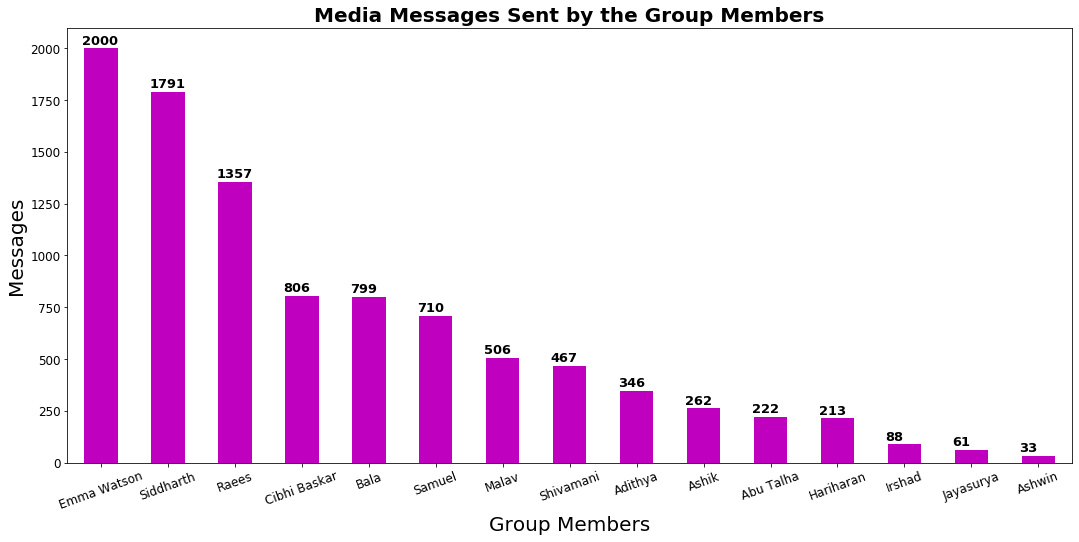

In [15]:
width = 18
height = 8
mp.figure(figsize=(width,height))
MediaTopper.plot(kind='bar', color='m')
for a,b in enumerate(MediaTopper): 
    mp.text(a-.28, b+20, str(b), color='black', fontsize=13, fontweight='bold')
mp.xticks(rotation=20, size=12)
mp.yticks(size=12)
mp.xlabel('Group Members', fontsize=20)
mp.ylabel('Messages', fontsize=20)
mp.title('Media Messages Sent by the Group Members', fontsize=20, fontweight='bold')

## Analysing Number of Messages Sent by the Group Members

In [16]:
Toppers = df['Author'].value_counts()
Toppers

Emma Watson     8905
Siddharth       7685
Cibhi Baskar    7054
Raees           6654
Samuel          5964
Bala            3871
Shivamani       2908
Hariharan       2070
Adithya         1671
Abu Talha       1237
Malav            974
Irshad           815
Ashik            617
Ashwin           265
Jayasurya        178
Name: Author, dtype: int64

Text(0.5, 1.0, 'Number of Messages Sent by the Group Members')

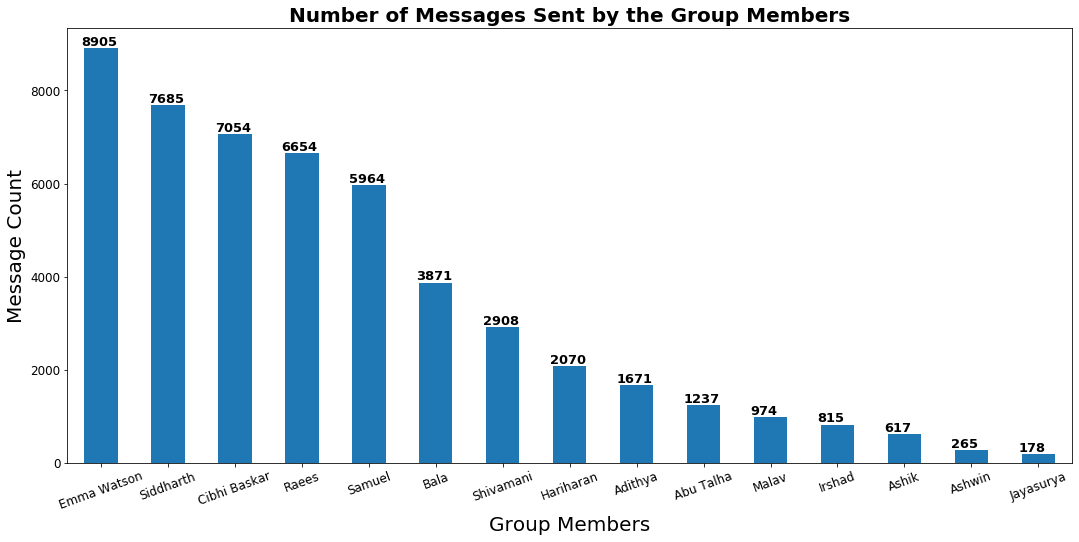

In [17]:
width = 18
height = 8
mp.figure(figsize=(width,height))
Toppers.plot(kind='bar')
for a,b in enumerate(Toppers): 
    mp.text(a-.30, b+60, str(b), color='black', fontsize=13, fontweight='bold')
mp.xticks(rotation=20, size=12)
mp.yticks(size=12)
mp.xlabel('Group Members', fontsize=20)
mp.ylabel('Message Count', fontsize=20)
mp.title('Number of Messages Sent by the Group Members', fontsize=20, fontweight='bold')

## Top 25 Active Days of the WhatsApp Group

In [18]:
TopDate = df['Date'].value_counts().head(25)
TopDate

24/07/2020    1953
21/07/2020    1330
17/07/2020    1306
16/07/2020    1155
13/07/2020    1112
03/04/2020    1076
29/06/2020     874
23/07/2020     826
15/07/2020     819
06/05/2020     717
23/03/2020     647
20/07/2020     632
14/07/2020     627
07/05/2020     577
19/05/2020     576
22/07/2020     548
28/03/2020     530
22/04/2020     504
28/05/2020     492
16/04/2020     479
08/05/2020     479
18/05/2020     470
27/03/2020     443
04/05/2020     441
05/05/2020     440
Name: Date, dtype: int64

Text(0.5, 1.0, 'Top 25 Active Days of the WhatsApp Group')

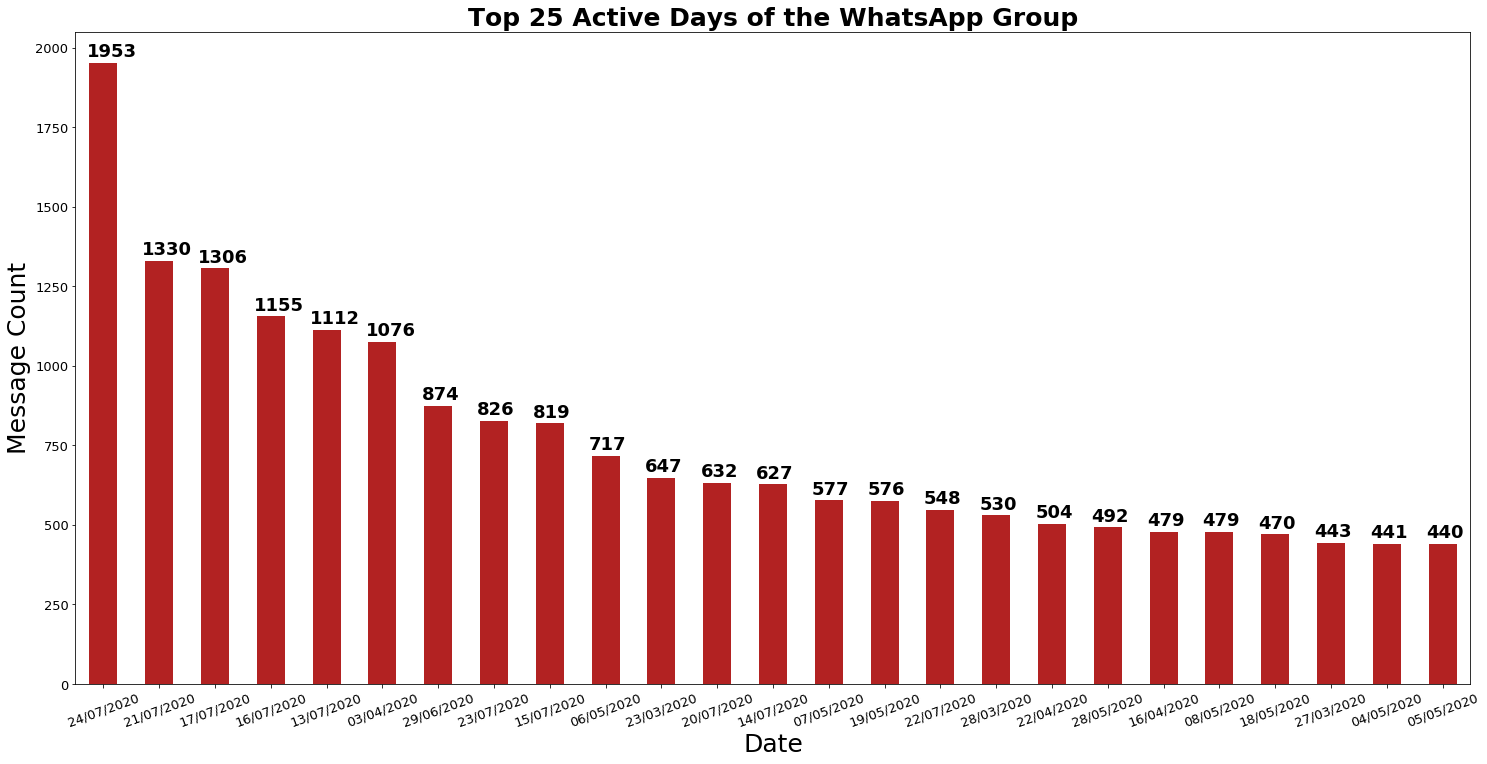

In [37]:
width = 25
height = 12
mp.figure(figsize=(width,height))
TopDate.plot(kind='bar', color='firebrick')
for a,b in enumerate(TopDate): 
    mp.text(a-.30, b+20, str(b), color='black', fontsize=18, fontweight='bold')
mp.xticks(rotation=20, size=13)
mp.yticks(size=13)
mp.xlabel('Date', fontsize=25)
mp.ylabel('Message Count', fontsize=25)
mp.title('Top 25 Active Days of the WhatsApp Group', fontsize=25, fontweight='bold')

## Total Message Count - This Year vs Last Year

In [20]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extracting Year from the Date
YearData = df['Date'].dt.year
TopYear = YearData.value_counts()

Text(0.5, 1.0, 'Total Message Count - This Year vs Last Year')

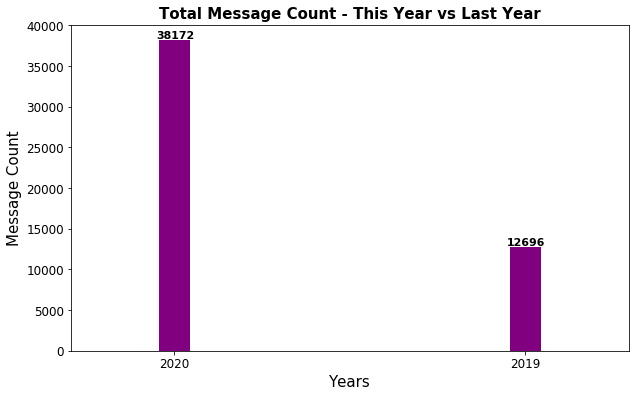

In [21]:
width = 10
height = 6
mp.figure(figsize=(width,height))
TopYear.plot(kind='bar', color='purple', width=0.09)
for a,b in enumerate(TopYear): 
    mp.text(a-.052, b+250, str(b), color='black', fontsize=11, fontweight='bold')
mp.xticks(rotation=0.1, size=12)
mp.yticks(size=12)
mp.xlabel('Years', fontsize=15)
mp.ylabel('Message Count', fontsize=15)
mp.title('Total Message Count - This Year vs Last Year', fontsize=15, fontweight='bold')

## Total Message Count - Last 18 Months

In [22]:
# Extracting Month and Year from Date
df['Month_year'] = df['Date'].dt.to_period('M')

TopMonth = df['Month_year'].value_counts()
TopMonth = TopMonth.sort_index()

Text(0.5, 1.0, 'Total Message Count - Last 18 Months')

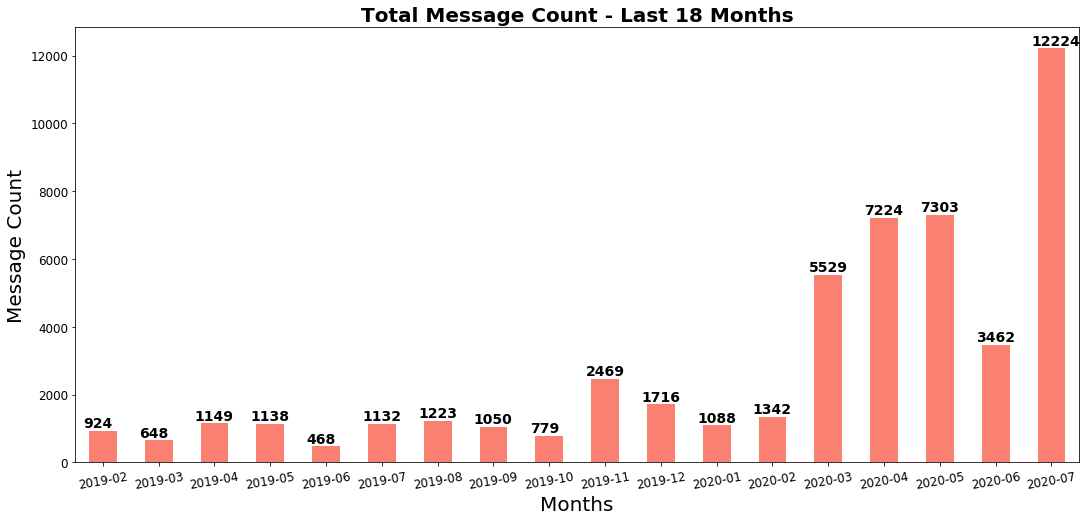

In [36]:
width = 18
height = 8
mp.figure(figsize=(width,height))

TopMonth.plot(kind='bar', color='salmon')
for a,b in enumerate(TopMonth): 
    mp.text(a-.35, b+100, str(b), color='black', fontsize=14, fontweight='bold')

mp.xticks(rotation=10, size=12)
mp.yticks(size=12)
mp.xlabel('Months', fontsize=20)
mp.ylabel('Message Count', fontsize=20)
mp.title('Total Message Count - Last 18 Months', fontsize=20, fontweight='bold')

## Active hours of the WhatsApp Group

In [24]:
df['Hour'] = df['Time'].apply(lambda a : a.split(':')[0])
df

,Date,Time,Author,Message,Month_year,Hour
1,2019-02-01,09:53,Adithya,Alika mam,2019-02,09
2,2019-02-01,09:53,Adithya,Know,2019-02,09
3,2019-02-01,09:53,Emma Watson,Akila,2019-02,09
4,2019-02-01,09:53,Emma Watson,da,2019-02,09
5,2019-02-01,10:11,Adithya,Mamae,2019-02,10
...,...,...,...,...,...,...
51013,2020-07-24,23:24,Emma Watson,<Media omitted>,2020-07,23
51014,2020-07-24,23:36,Samuel,<Media omitted>,2020-07,23
51015,2020-07-24,23:36,Cibhi Baskar,<Media omitted>,2020-07,23
51016,2020-07-24,23:38,Samuel,<Media omitted>,2020-07,23


In [25]:
TopHours = df['Hour'].value_counts()
TopHours = TopHours.sort_index()

Text(0.5, 1.0, 'Active hours of the WhatsApp Group')

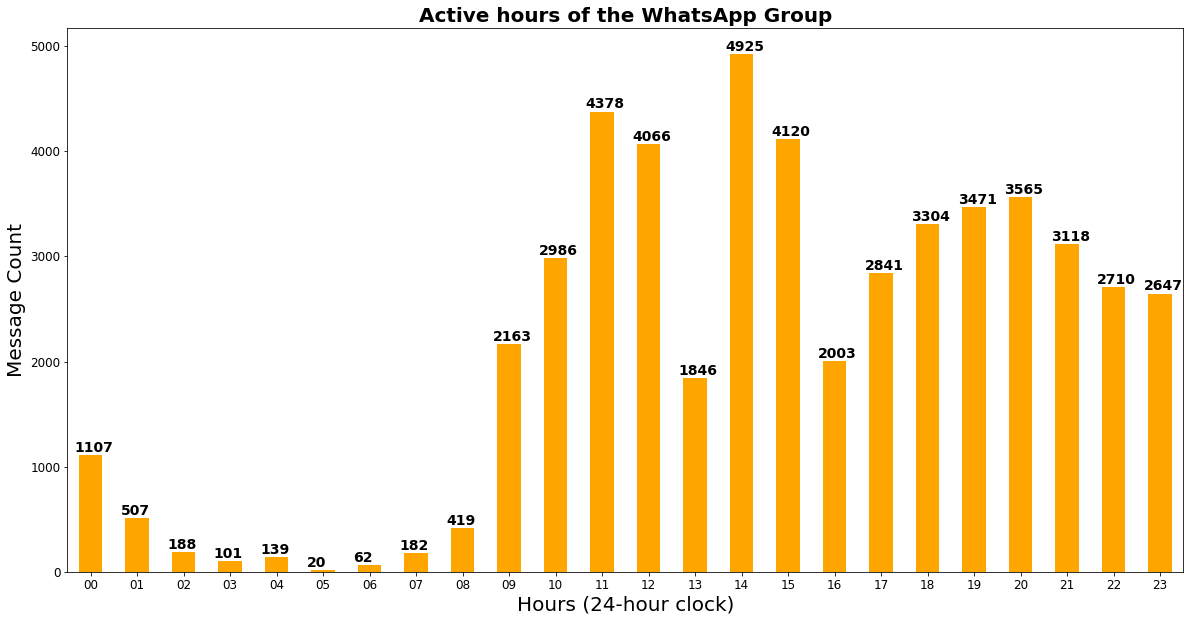

In [26]:
width = 20
height = 10
mp.figure(figsize=(width,height))
TopHours.plot(kind='bar', color='orange')
for a,b in enumerate(TopHours): 
    mp.text(a-.35, b+30, str(b), color='black', fontsize=14, fontweight='bold')
mp.xticks(rotation=0.1, size=12)
mp.yticks(size=12)
mp.xlabel('Hours (24-hour clock)', fontsize=20)
mp.ylabel('Message Count', fontsize=20)
mp.title('Active hours of the WhatsApp Group', fontsize=20, fontweight='bold')

## Finding the Letter and Word Count of Each Message

In [27]:
# Dropping the Media Values from the DataFrame, since it is not required anymore.
df = df.drop(MediaValues.index)
df

,Date,Time,Author,Message,Month_year,Hour
1,2019-02-01,09:53,Adithya,Alika mam,2019-02,09
2,2019-02-01,09:53,Adithya,Know,2019-02,09
3,2019-02-01,09:53,Emma Watson,Akila,2019-02,09
4,2019-02-01,09:53,Emma Watson,da,2019-02,09
5,2019-02-01,10:11,Adithya,Mamae,2019-02,10
...,...,...,...,...,...,...
51005,2020-07-24,23:21,Emma Watson,Sema player,2020-07,23
51006,2020-07-24,23:21,Emma Watson,Tamilan,2020-07,23
51008,2020-07-24,23:21,Samuel,Lol,2020-07,23
51011,2020-07-24,23:22,Raees,4.9 mb da,2020-07,23


In [28]:
df['Letters'] = df['Message'].apply(lambda s : len(s))
df['WordCount'] = df['Message'].apply(lambda s : len(s.split(" ")))
df

,Date,Time,Author,Message,Month_year,Hour,Letters,WordCount
1,2019-02-01,09:53,Adithya,Alika mam,2019-02,09,9,2
2,2019-02-01,09:53,Adithya,Know,2019-02,09,4,1
3,2019-02-01,09:53,Emma Watson,Akila,2019-02,09,5,1
4,2019-02-01,09:53,Emma Watson,da,2019-02,09,2,1
5,2019-02-01,10:11,Adithya,Mamae,2019-02,10,5,1
...,...,...,...,...,...,...,...,...
51005,2020-07-24,23:21,Emma Watson,Sema player,2020-07,23,11,2
51006,2020-07-24,23:21,Emma Watson,Tamilan,2020-07,23,7,1
51008,2020-07-24,23:21,Samuel,Lol,2020-07,23,3,1
51011,2020-07-24,23:22,Raees,4.9 mb da,2020-07,23,9,3


## Analysing Which Group Member Has Highest Letter and Word Count

In [29]:
GroupedData = df.groupby(['Author']).sum()
LetterGroupedData = GroupedData.sort_values(by=['Letters'], ascending=False)
WordGroupedData = GroupedData.sort_values(by=['WordCount'], ascending=False)
GroupedData

,Letters,WordCount
Author,,
Abu Talha,40457,6478
Adithya,26448,4562
Ashik,5252,905
Ashwin,9778,1632
Bala,50939,9707
Cibhi Baskar,134376,23878
Emma Watson,86564,17641
Hariharan,38449,7011
Irshad,15824,2753


Text(0.5, 1.0, 'Letters Count by the Group Members')

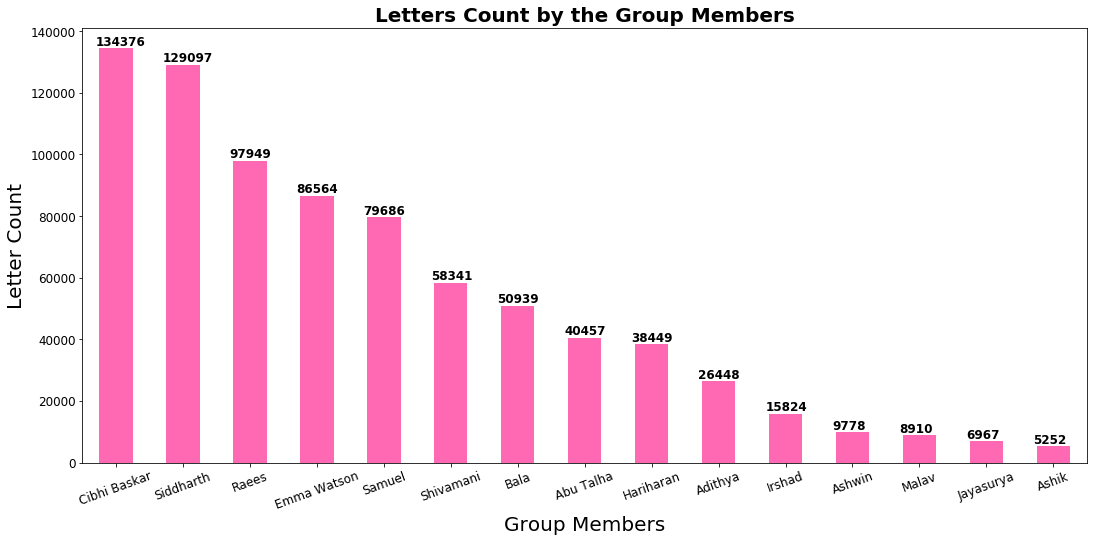

In [30]:
width = 18
height = 8
mp.figure(figsize=(width,height))
LetterGroupedData['Letters'].plot(kind='bar', color='hotpink')
for a,b in enumerate(LetterGroupedData['Letters']): 
    mp.text(a-.30, b+950, str(b), color='black', fontsize=12, fontweight='bold')
mp.xticks(rotation=20, size=12)
mp.yticks(size=12)
mp.xlabel('Group Members', fontsize=20)
mp.ylabel('Letter Count', fontsize=20)
mp.title('Letters Count by the Group Members', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Word Count by the Group Members')

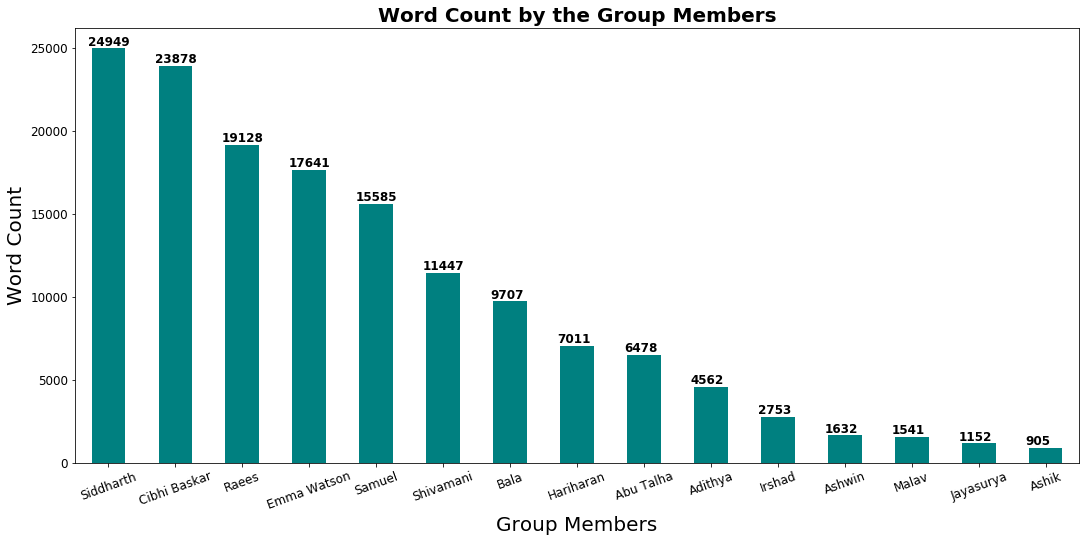

In [31]:
width = 18
height = 8
mp.figure(figsize=(width,height))
WordGroupedData['WordCount'].plot(kind='bar', color='teal')
for a,b in enumerate(WordGroupedData['WordCount']): 
    mp.text(a-.30, b+200, str(b), color='black', fontsize=12, fontweight='bold')
mp.xticks(rotation=20, size=12)
mp.yticks(size=12)
mp.xlabel('Group Members', fontsize=20)
mp.ylabel('Word Count', fontsize=20)
mp.title('Word Count by the Group Members', fontsize=20, fontweight='bold')

# THE END